In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

### **1. Loading Data**

In [2]:
df = pd.read_csv('../Data/laptopPrice.csv')

In [3]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [4]:
print(df.shape)

(823, 19)


### **2. Data Checks**
- Checking missing values
- Checking duplicates
- Checking data types of each column
- Checking the number of unique values of each column
- Checking statistics of data set
- Checking various categories present in different categorical column

In [5]:
df.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [6]:
df.duplicated().sum()

21

In [7]:
df = df.drop_duplicates()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              802 non-null    object
 1   processor_brand    802 non-null    object
 2   processor_name     802 non-null    object
 3   processor_gnrtn    802 non-null    object
 4   ram_gb             802 non-null    object
 5   ram_type           802 non-null    object
 6   ssd                802 non-null    object
 7   hdd                802 non-null    object
 8   os                 802 non-null    object
 9   os_bit             802 non-null    object
 10  graphic_card_gb    802 non-null    object
 11  weight             802 non-null    object
 12  warranty           802 non-null    object
 13  Touchscreen        802 non-null    object
 14  msoffice           802 non-null    object
 15  Price              802 non-null    int64 
 16  rating             802 non-null    object
 17  Nu

In [9]:
df.nunique()

brand                  8
processor_brand        3
processor_name        11
processor_gnrtn        8
ram_gb                 4
ram_type               6
ssd                    7
hdd                    4
os                     3
os_bit                 2
graphic_card_gb        5
weight                 3
warranty               4
Touchscreen            2
msoffice               2
Price                405
rating                 5
Number of Ratings    282
Number of Reviews    135
dtype: int64

In [10]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,802.000000,802.00000,802.000000
mean,76625.543641,299.84414,36.089776
std,45232.984422,1001.78442,118.313553
min,16990.000000,0.00000,0.000000
25%,45990.000000,0.00000,0.000000
50%,63990.000000,17.00000,2.000000
75%,89525.000000,140.25000,18.000000
max,441990.000000,15279.00000,1947.000000


#### **Insights**
- There are some outliers in all the 3 numerical columns
- No missing values in the dataset

In [11]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print("Numerical features: ", numeric_features)
print("Categorical featues:", cat_features)

Numerical features:  ['Price', 'Number of Ratings', 'Number of Reviews']
Categorical featues: ['brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb', 'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating']


### **3. Data Visualization**

#### 3.1 Histograms

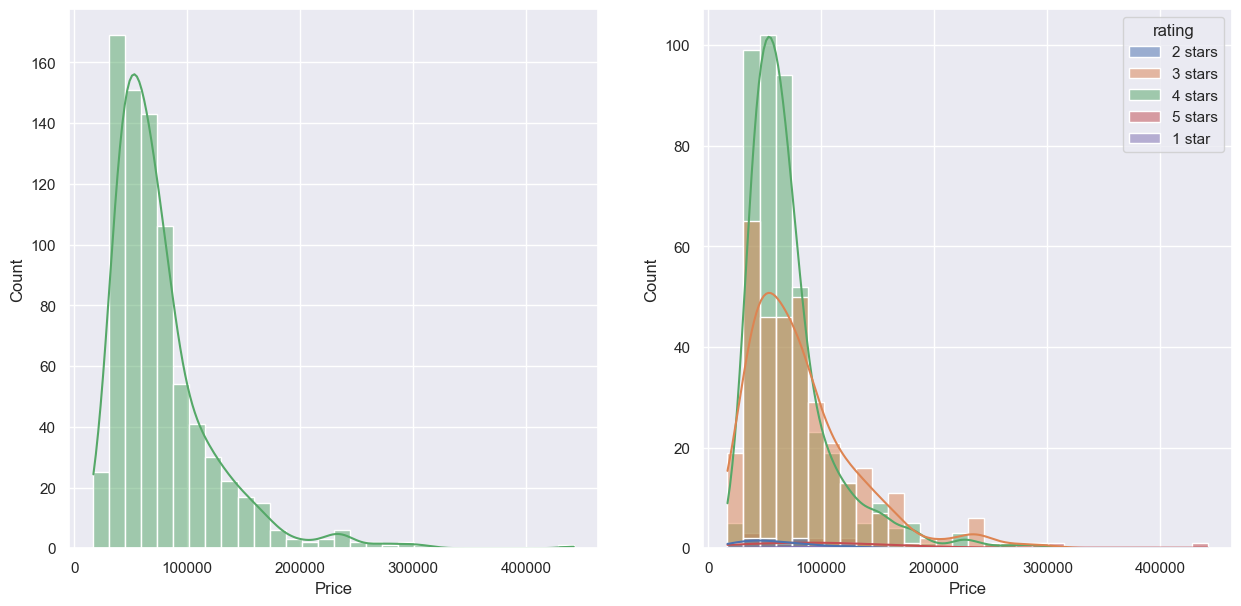

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x= 'Price', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x= 'Price', bins=30, kde=True, color='g', hue= 'rating')
plt.show()

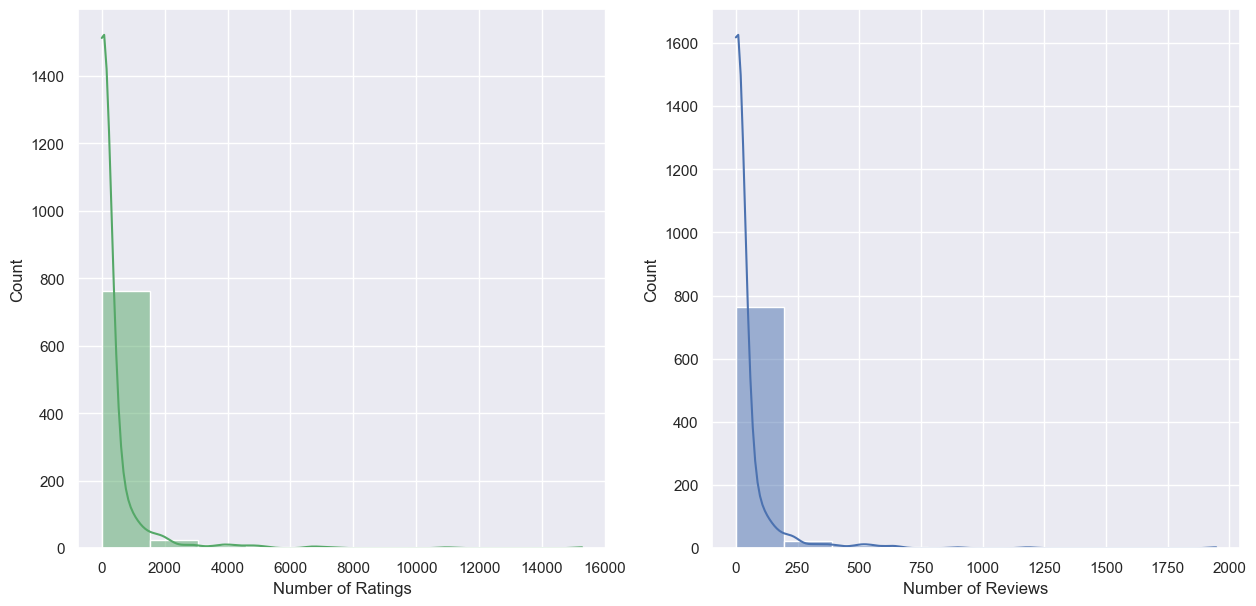

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Number of Ratings',bins=10,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Number of Reviews',kde=True, bins = 10)
plt.show()

#### 3.2 Multivariate Analysis

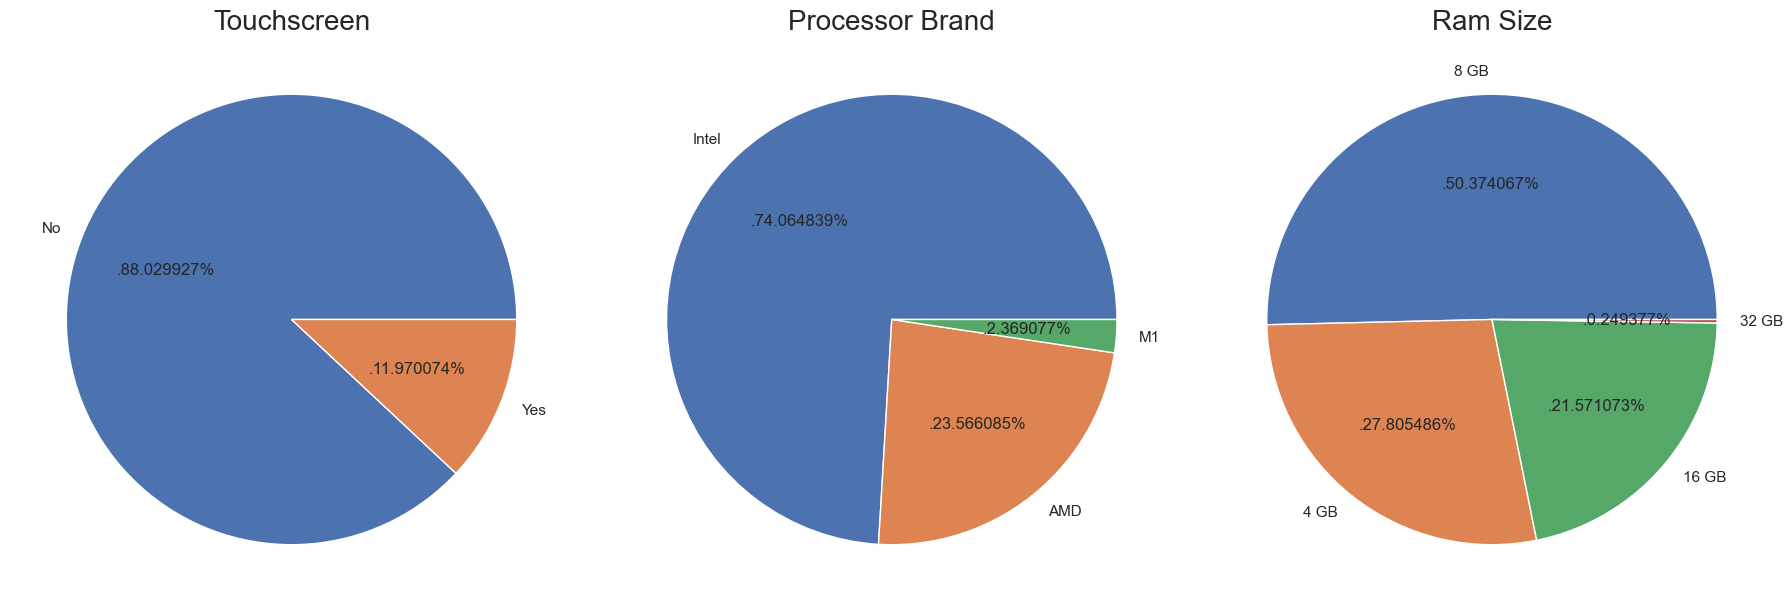

In [14]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['Touchscreen'].value_counts()
labels = 'No', 'Yes'
plt.pie(size, labels = labels,autopct = '.%2f%%')
plt.title('Touchscreen', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['processor_brand'].value_counts()
labels = 'Intel', 'AMD','M1'
plt.pie(size,labels = labels,autopct = '.%2f%%')
plt.title('Processor Brand', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['ram_gb'].value_counts()
labels = '8 GB', '4 GB','16 GB', '32 GB'
plt.pie(size,labels = labels,autopct = '.%2f%%')
plt.title('Ram Size', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

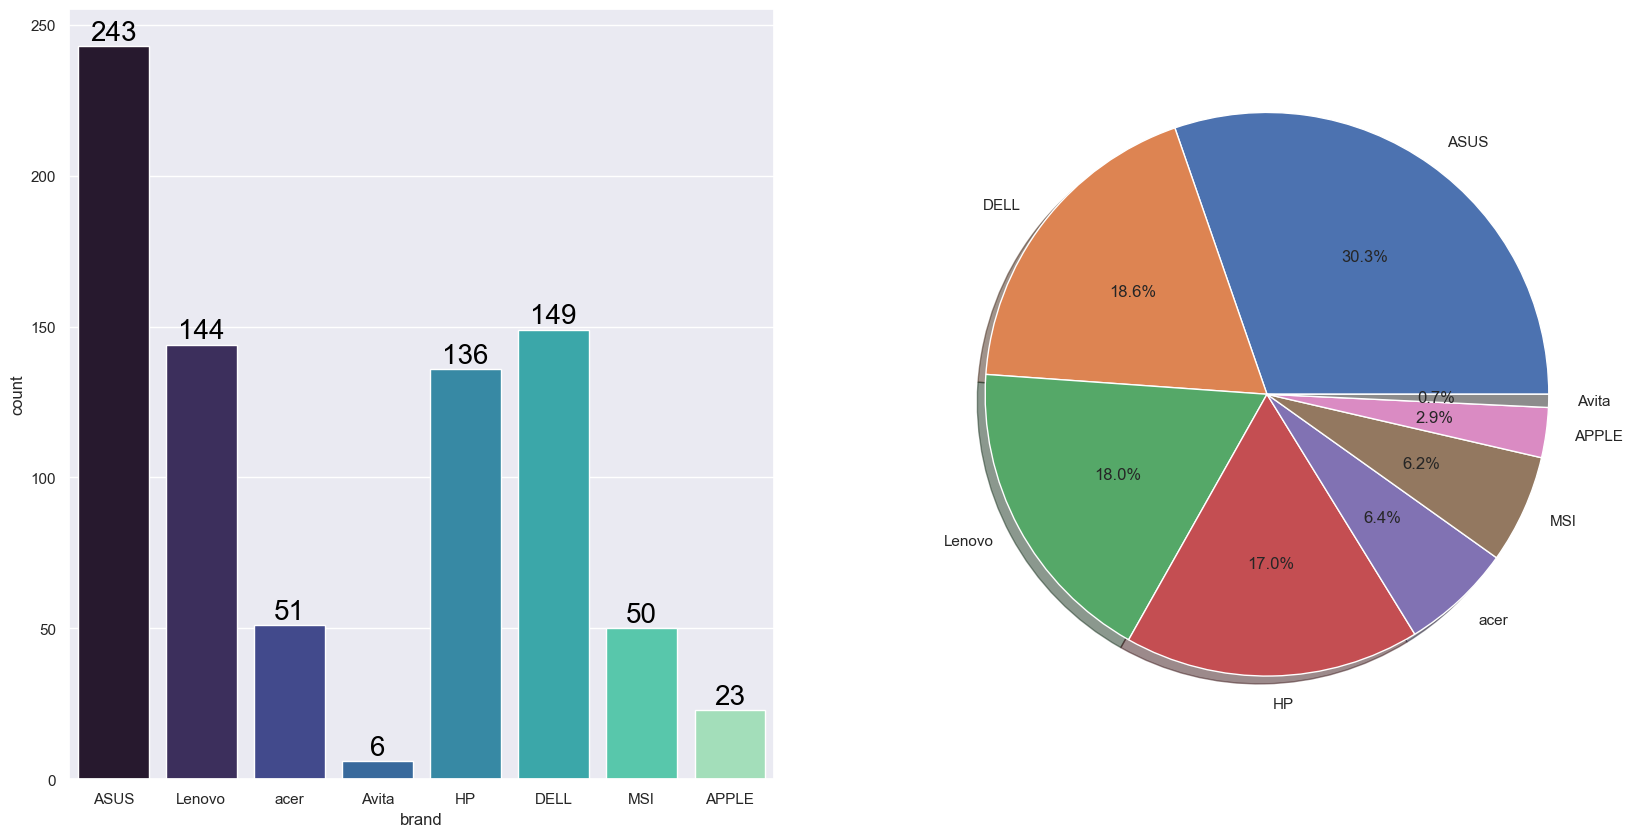

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x= df['brand'],data=df,palette = 'mako',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['brand'].value_counts(),labels=df['brand'].value_counts().index,autopct='%1.1f%%',shadow=True)
plt.show()  

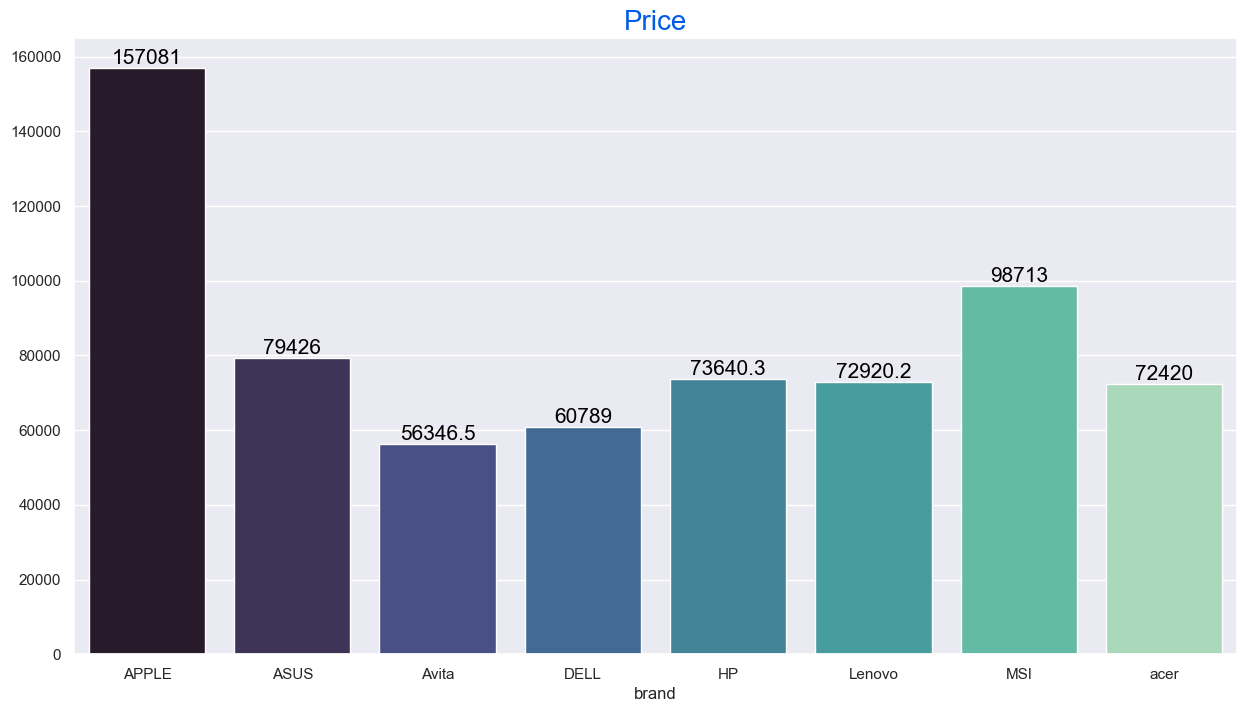

In [30]:
Group_data = df.groupby('brand')
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = Group_data ['Price'].mean().index, y = Group_data['Price'].mean().values, palette = 'mako')
ax.set_title('Price',color='#005ce6',size=20)
for container in ax.containers:
    ax.bar_label(container,color='black',size=15)

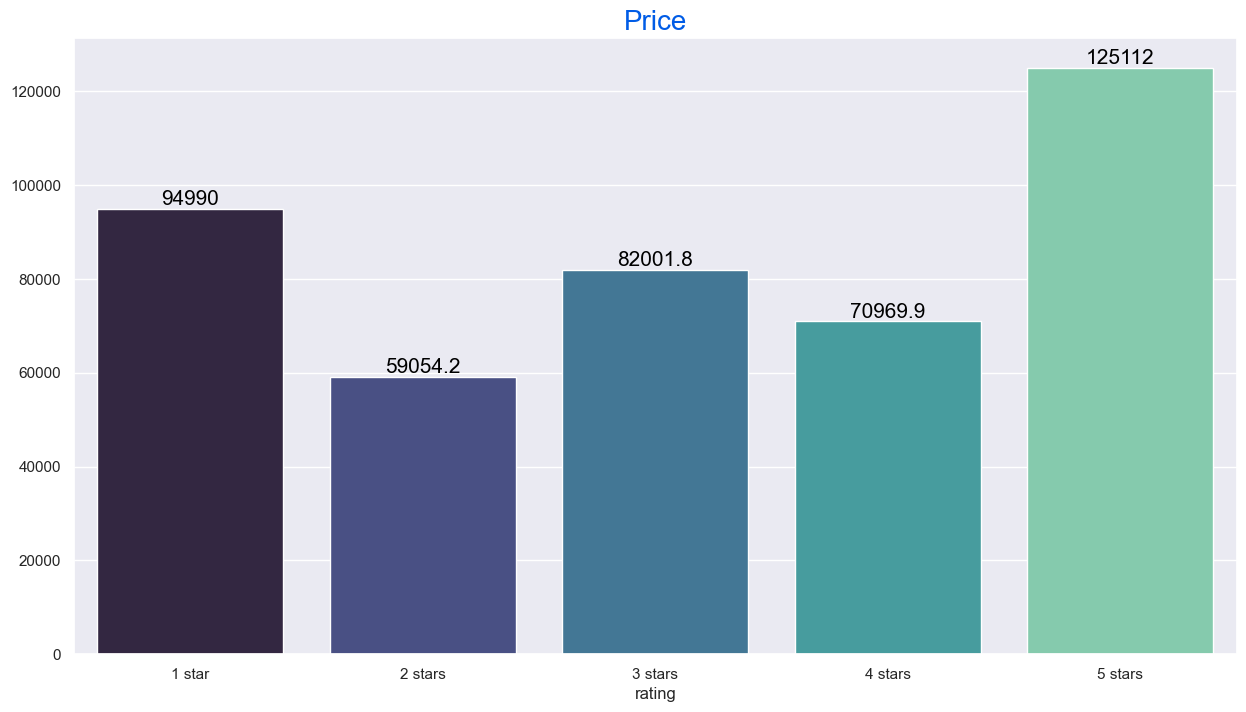

In [34]:
Group_data = df.groupby('rating')
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = Group_data ['Price'].mean().index, y = Group_data['Price'].mean().values, palette = 'mako')
ax.set_title('Price',color='#005ce6',size=20)
for container in ax.containers:
    ax.bar_label(container,color='black',size=15)

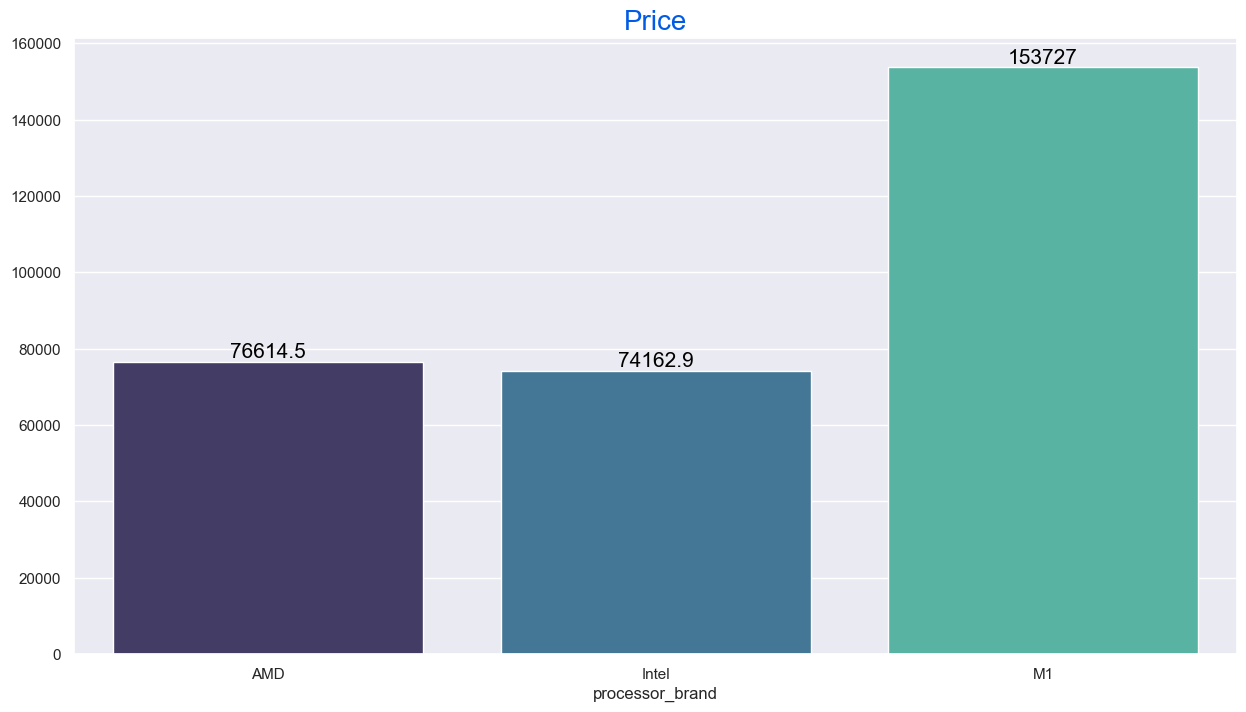

In [37]:
Group_data = df.groupby('processor_brand')
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = Group_data ['Price'].mean().index, y = Group_data['Price'].mean().values, palette = 'mako')
ax.set_title('Price',color='#005ce6',size=20)
for container in ax.containers:
    ax.bar_label(container,color='black',size=15)

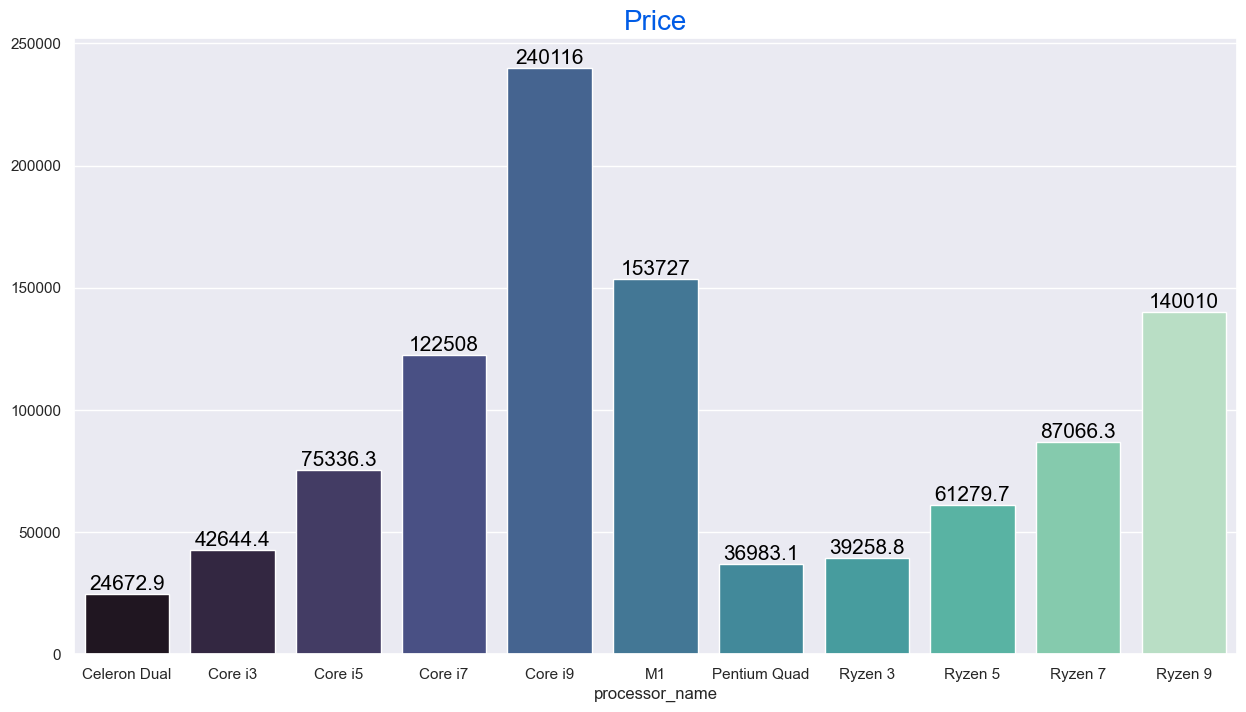

In [38]:
Group_data = df.groupby('processor_name')
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = Group_data ['Price'].mean().index, y = Group_data['Price'].mean().values, palette = 'mako')
ax.set_title('Price',color='#005ce6',size=20)
for container in ax.containers:
    ax.bar_label(container,color='black',size=15)

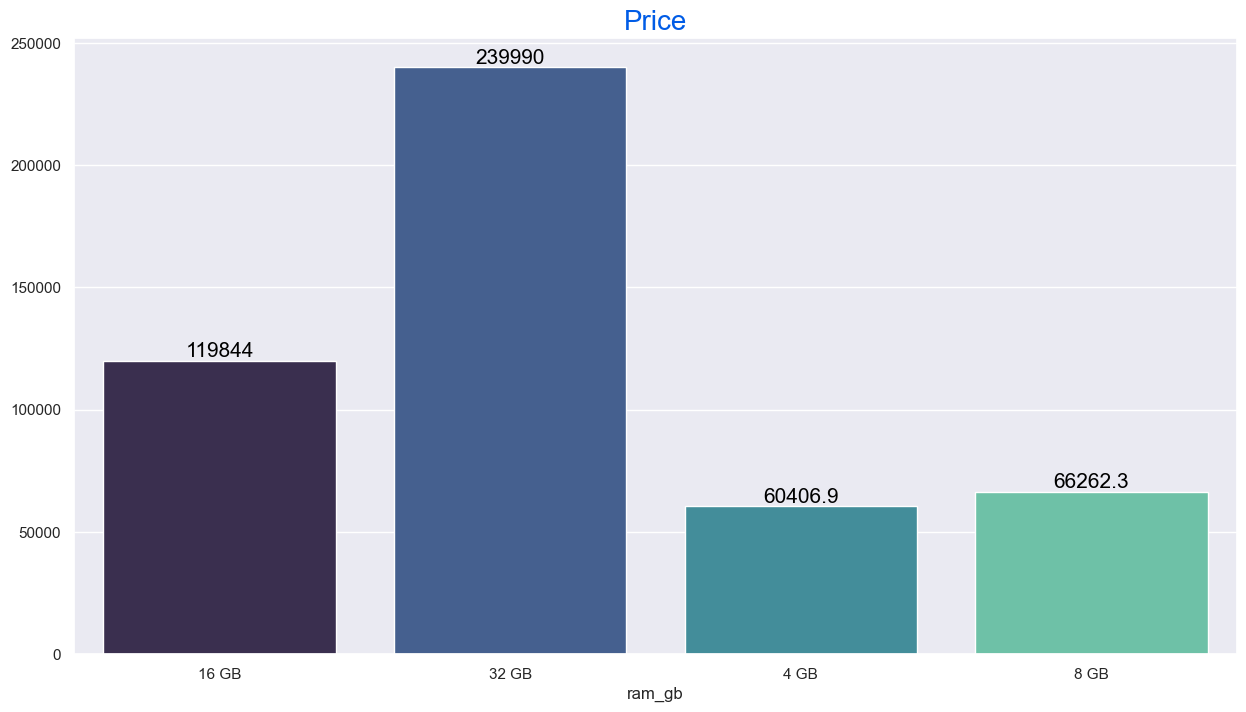

In [39]:
Group_data = df.groupby('ram_gb')
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = Group_data ['Price'].mean().index, y = Group_data['Price'].mean().values, palette = 'mako')
ax.set_title('Price',color='#005ce6',size=20)
for container in ax.containers:
    ax.bar_label(container,color='black',size=15)

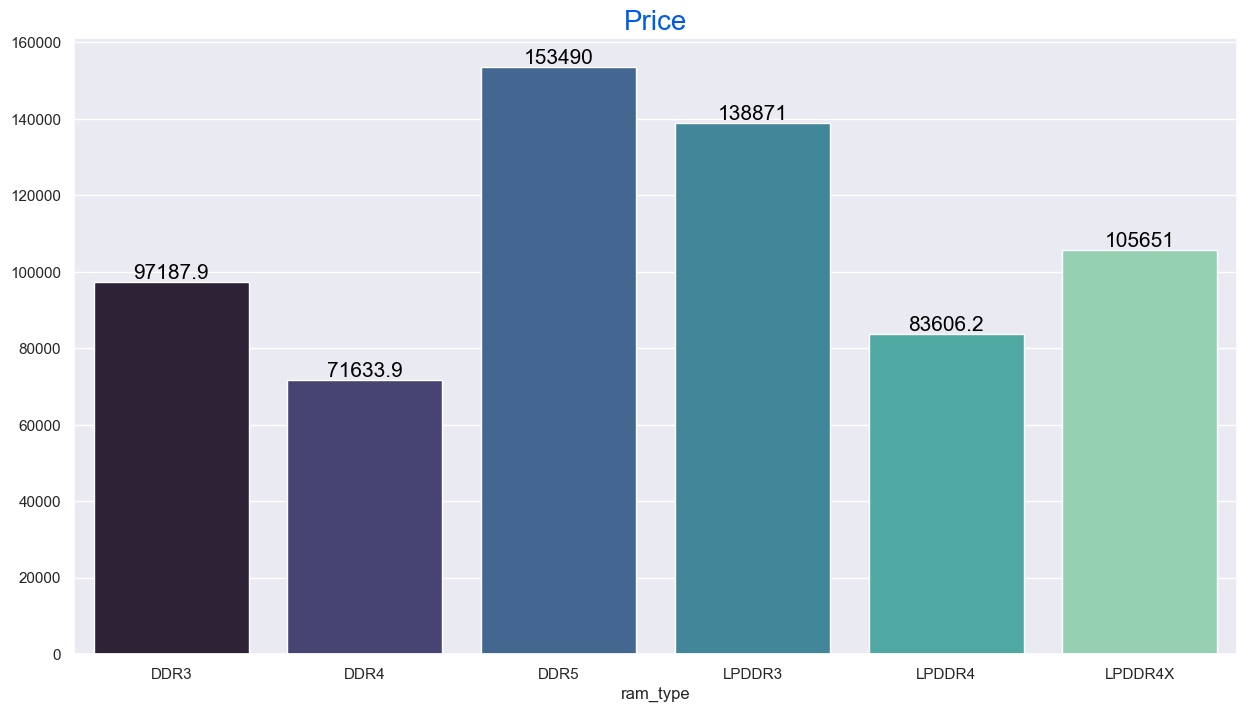

In [40]:
Group_data = df.groupby('ram_type')
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = Group_data ['Price'].mean().index, y = Group_data['Price'].mean().values, palette = 'mako')
ax.set_title('Price',color='#005ce6',size=20)
for container in ax.containers:
    ax.bar_label(container,color='black',size=15)